<a href="https://colab.research.google.com/github/arshanbhag22/bharat-intern/blob/main/new_cats%26dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:06<00:00, 228MB/s]
100% 1.06G/1.06G [00:06<00:00, 175MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall("/content")
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [6]:
#generators -create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode = "int",
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = "inferred",
    label_mode = "int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [8]:
#creating CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))






In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization (Batch  (None, 125, 125, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                        

In [11]:
history = model.fit(train_ds, epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 3605s 6s/step - loss: 1.0282 - accuracy: 0.6072 - val_loss: 1.0324 - val_accuracy: 0.5418
Epoch 2/10
625/625 [==============================] - 3557s 6s/step - loss: 0.5582 - accuracy: 0.7156 - val_loss: 0.5819 - val_accuracy: 0.6878
Epoch 3/10
625/625 [==============================] - 3519s 6s/step - loss: 0.5254 - accuracy: 0.7472 - val_loss: 0.5611 - val_accuracy: 0.7098
Epoch 4/10
625/625 [==============================] - 3522s 6s/step - loss: 0.4513 - accuracy: 0.7883 - val_loss: 0.5395 - val_accuracy: 0.7320
Epoch 5/10
625/625 [==============================] - 3548s 6s/step - loss: 0.4115 - accuracy: 0.8160 - val_loss: 0.4957 - val_accuracy: 0.7500
Epoch 6/10
625/625 [==============================] - 3513s 6s/step - loss: 0.3169 - accuracy: 0.8605 - val_loss: 0.4577 - val_accuracy: 0.8096
Epoch 7/10
625/625 [==============================] - 3523s 6s/step - loss: 0.2486 - accuracy: 0.8954 - val_loss: 0.6015 - val_accuracy:

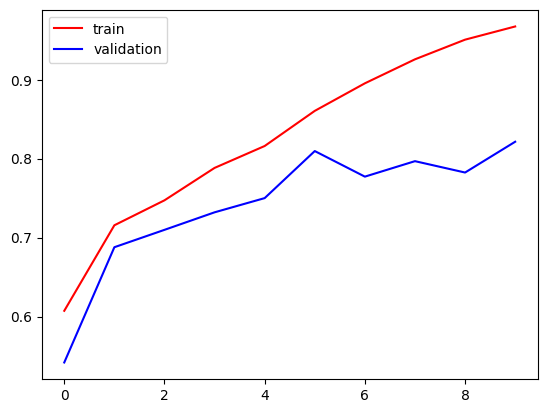

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()



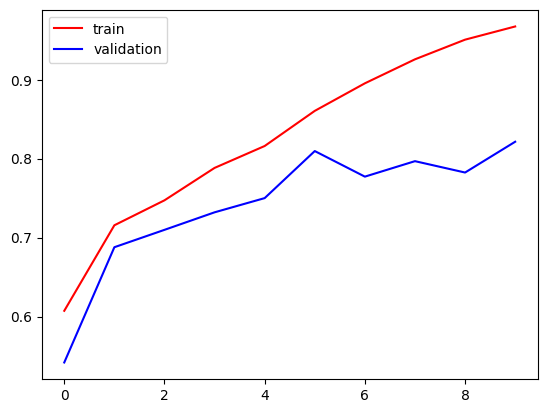

In [14]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

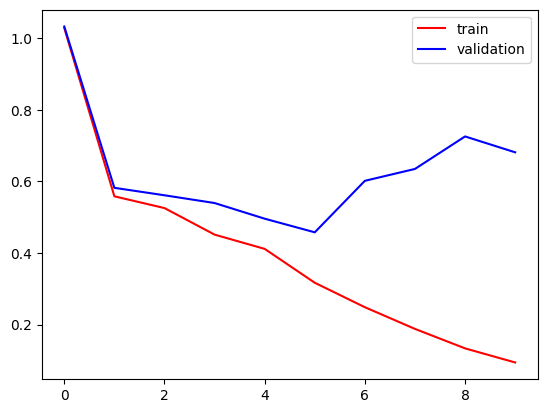

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

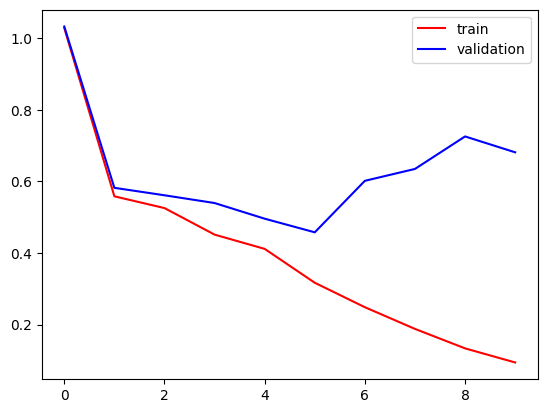

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
#need to reduce complexity
#add more data
#reducing complexity

In [18]:
import cv2

In [19]:
test_image = cv2.imread('/content/cat.jpg')

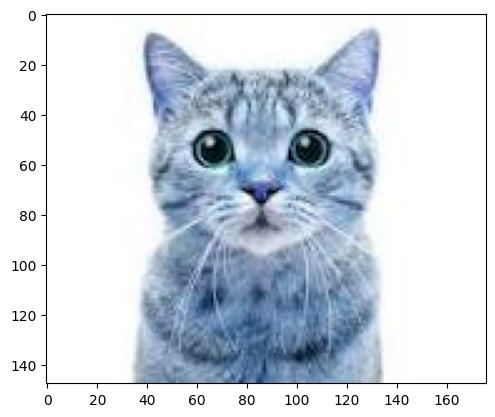

In [20]:
plt.imshow(test_image)

In [21]:
test_image.shape

(148, 176, 3)

In [22]:
test_image = cv2.resize(test_image,(256,256))

In [25]:
test_input = test_image.reshape(1,256,256,3)

In [26]:
model.predict(test_input)

1/1 [==============================] - 0s 218ms/step


array([[0.00102776]], dtype=float32)

In [28]:
test_image = cv2.imread('/content/dog.jpg')

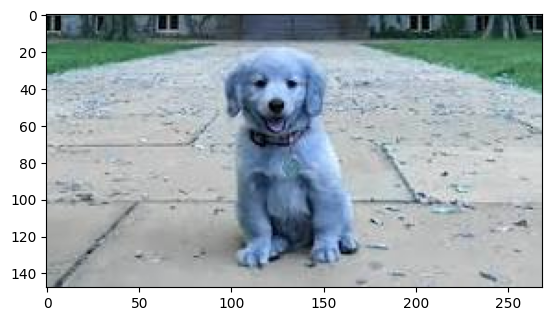

In [29]:
plt.imshow(test_image)

In [30]:
test_image.shape

(148, 269, 3)

In [31]:
test_image = cv2.resize(test_image,(256,256))

In [32]:
test_input = test_image.reshape(1,256,256,3)

In [33]:
model.predict(test_input)

1/1 [==============================] - 0s 110ms/step


array([[0.9774144]], dtype=float32)